In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Statistik<a class='tocSkip'></a>
## Introduktion med Python <a class='tocSkip'></a>
## Version 0.1 - September 2019 (Dansk)<a class='tocSkip'></a>

> Vi kigger på statistik og data behandling.  
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

### Christian Holm Christensen <a class='tocSkip'></a>

# Statistics<a class='tocSkip'></a>
## Introduction with Python <a class='tocSkip'></a>
## Version 0.1 - September 2019 (English)<a class='tocSkip'></a>

> We look at statistics and data processing.
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institute <a class='tocSkip'></a>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

/tmp/ipykernel_454209/406809543.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Data og statistik

- Vi måler $x$
- Hver gang vi gentager målingen får vi et lidt anderledes resultat
- Hvad er vores måleresultat? 

# Data and statistics

- We measure $x$
- Every time we repeat the measurement we get a slightly different result
- What is our measurement result?

Svaret er bestemt via _statistik_

The answer is determined via _statistics_

# Citat:

> Statistics is the science of learning from data, and of measuring, controlling, and communicating uncertainty; 
> and it thereby provides the navigation essential for controlling the course of scientific and societal advances.
> This field will become ever more critical as academia, businesses, and governments rely increasingly on data
>-driven decisions, expanding the demand for statistics expertise.

[Science, Vol. 336, Issue 6077, pp. 12](https://doi.org/10.1126/science.1218685)

# Quote:

> Statistics is the science of learning from data, and of measuring, controlling, and communicating uncertainties;
> and it thereby provides the navigation essential for controlling the course of scientific and societal advances.
> This field will become ever more critical as academia, businesses, and governments rely increasingly on data
> -Driven decisions, expanding the demand for statistics expertise.

[Science, Vol. 336, Issue 6077, p. 12](https://doi.org/10.1126/science.1218685)

# Tankeeksperiment

Tre menesker ved en moterveejsbro tæller røde biler 

- Én er farveblind og tæller alle grønne og røde biler 
- Én har festet natten før og sover halvdelen af tiden, og resten af tiden tæller kun halvdelen af alle røde biler 
- Den sidste har sovet dårligt (pga. ovenover) og tæller kun halvdelen af alle røde biler 

# Thought experiment

Three people at a motorway bridge count red cars

- One is color blind and counts all green and red cars
- One partied the night before and sleeps half the time, and the rest of the time only counts half of all red cars
- The last one has slept poorly (due to above) and counts only half of all red cars

Antag $N=100$ røde biler passerer, så har vi at 

Suppose $N=100$ red cars pass, then we have that

In [3]:
N=100
NN=np.array([2*N, 1/2*1/2*N, 1/2*N])

Hvad er svaret?

What is the answer?

## Præcision 

Usikkerhed på tælletal $n$: $\delta_n=\sqrt{n}$, så 

## Precision

Counting uncertainty $n$: $\delta_n=\sqrt{n}$, so

In [4]:
dNN = np.sqrt(NN)
for i,(n,dn) in enumerate(zip(NN,dNN)):
    print('Obs {}: {} +/- {}'.format(i+1,n,dn))

Obs 1: 200.0 +/- 14.142135623730951
Obs 2: 25.0 +/- 5.0
Obs 3: 50.0 +/- 7.0710678118654755


Relativt

relatively

In [5]:
for i,(n,dn) in enumerate(zip(NN,dNN)):
    print('Obs {} relativ usikkerhed: {:6.2f}%'.format(i+1,100*dn/n))

Obs 1 relativ usikkerhed:   7.07%
Obs 2 relativ usikkerhed:  20.00%
Obs 3 relativ usikkerhed:  14.14%


Observatør 1 har den bedst bestemte værdi - eller mest _præcise_ (engl. _precise_) værdi

Observer 1 has the best determined value - or the most _precise_ value

## Nøjagtighed

Lad os sammenligne med den "sande" værdi

## Accuracy

Let's compare with the "true" value

In [6]:
for i,(n,dn) in enumerate(zip(NN,dNN)):
    print('Obs {} måling {:5.1f} +/- {:4.1f} er cirka {:2.0f} usikkerheder fra N={}'
          .format(i+1, n, dn, np.abs(N-n)/dn, n))

Obs 1 måling 200.0 +/- 14.1 er cirka  7 usikkerheder fra N=200.0
Obs 2 måling  25.0 +/-  5.0 er cirka 15 usikkerheder fra N=25.0
Obs 3 måling  50.0 +/-  7.1 er cirka  7 usikkerheder fra N=50.0


Observatørene 1 og 3 er altså _lige_ tætte på den "sande" værdi, mens Observatør 2 er langt fra.

De er mere _nøjagtige_ (engl. _accurate_) end Observatør 2 

Thus, observers 1 and 3 are _equally_ close to the "true" value, while observer 2 is far from.

They are more _accurate_ than Observer 2

## Præcision og Nøjagtighed 

(engl. _precision and accuracy_) 

- _Præcision_ er hvor godt vi kender vores resultat og kan beregnes statistisk 
- _Nøjagtighed_ er hvor tæt vi er på den "sande" resultat og kan oftes kun anslås 

## Precision and Accuracy

- _Precision_ is how well we know our results and can be calculated statistically
- _Accuracy_ is how close we are to the "true" result and can often only be estimated

_Statistik_ handler om præcision, mens det er en kunstform at være nøjagtig. 

_Eller_: Statistik fortæller os ikke hvor tæt vi er på den "sande" værdi

_Statistics_ is about precision, while it is an art-form to be accurate.

_Or_: Statistics do not tell us how close we are to the "true" value

# Middelværdi

Anne har lavet 10 målinger 

# Mean

Anne has made 10 measurements

In [7]:
data = np.array([2, 5, 2, 5, 1, 1, 3, 7, 2, 7])

Hvad er hendes result?

What is her result?

Gennemsnittet (eller middelværdi)

$$\overline{x} = \frac1N\sum_{i=1}^N x_i\quad.$$

The average

$$\overline{x} = \frac1N\sum_{i=1}^N x_i\quad.$$

In [8]:
resultat = data.mean()
print(resultat)

3.5


## Middelværdi som funktion af data størrelse

Lad os varierer data størrelsen (engl. _sample size_). 

- 1000 prøver 
- af tilfældig størrelse mellem 10 og 9999 ($N\sim U(10,9999)$)
- af tilfældige heltal mellem 0 og 9 ($X\sim U(0,9)$)

## Mean value as a function of data size

Let's vary the sample size.

- 1000 samples
- of random size between 10 and 9999 ($N\sim U(10,9999)$)
- of random integers between 0 and 9 ($X\sim U(0,9)$)

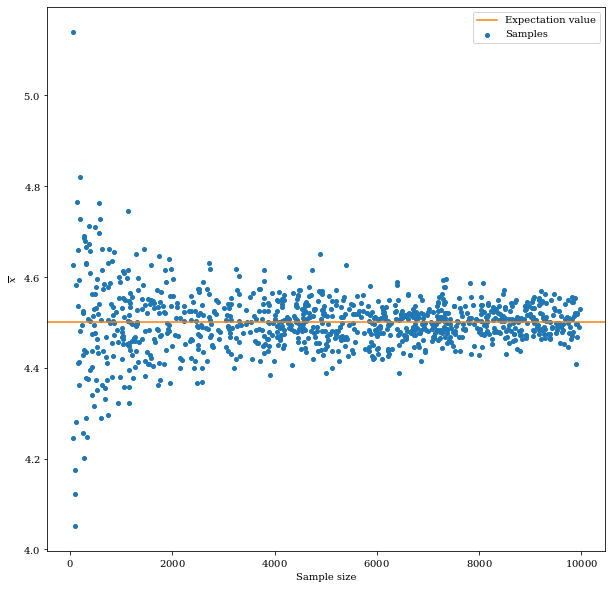

In [9]:
np.random.seed(123456)
data = np.array([(n,np.random.randint(0,10,size=n).mean()) 
                 for n in np.random.randint(10,10000,size=1000)])
plt.scatter(data[:,0],data[:,1],label='Samples',s=16)
plt.axhline(4.5,label='Expectation value',color='tab:orange')
plt.xlabel('Sample size')
plt.ylabel(r'$\overline{x}$')
plt.legend();

Anne får mere og mere præcise målinger jo større data størrelse

Anne gets more and more precise measurements the larger the sample size

# Usikkerheder 

- Statistisk usikkerhed: Variation i fundne værdier 
- Kvantiseret som _varians_ (engl. _variance_)

Hvis $\hat{x}$ er en _estimator_ af den "sande" værdi $x$, så er den kvadratiske usikkerhed givet ved _variansen_ af $\hat{x}$:

$$s_{\hat{x}}^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \overline{x})^2\quad,$$

og _standard afvigelsen_ er givet ved 

$$s_{\hat{x}} = \sqrt{s_{\hat{x}}^2}\quad,$$ 

så at usikkerheden er  

$$\delta_{\hat{x}} = s_{\hat{x}} = \sqrt{s_{\hat{x}}^2}\quad.$$


# Uncertainties

- Statistical uncertainty: Variation in values found
- Quantized as _variance_ 

If $\hat{x}$ is an _estimator_ of the "true" value of $x$, then the square uncertainty is given by the _variance_ of $\hat{x}$:

$$s_{\hat{x}}^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \overline{x})^2\quad,$$

and the _standard deviation_ is given by

$$s_{\hat{x}} = \sqrt{s_{\hat{x}}^2}\quad,$$

so that the uncertainty is

$$\delta_{\hat{x}} = s_{\hat{x}} = \sqrt{s_{\hat{x}}^2}\quad.$$

# Variantion af middelværdi 

Vi beregner variansen 

$$s^2_{\overline{x}} = \frac1N\sum_{i=1}^N \left(\overline{x}_i - \overline{\overline{x}}\right)^2\quad,$$

af _middelværdierne_ $\overline{x}_i$ i 30 intervaller af data størrelse 

# Variation of mean

We calculate the variance

$$s^2_{\overline{x}} = \frac1N\sum_{i=1}^N \left(\overline{x}_i - \overline{\overline{x}}\right)^2\quad,$$

of the _means_ $\overline{x}_i$ in 30 bins of the sample size

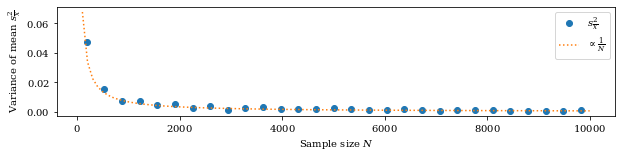

In [10]:
bins = np.linspace(10,10000,30)
vm = np.array([data[np.logical_and(data[:,0]>=l,data[:,0]<h)][:,1].var() 
               for l, h in zip(bins[:-1],bins[1:])])
plt.figure(figsize=(10,2))
plt.plot((bins[1:]+bins[:-1])/2,vm,'o',label=r'$s_{\overline{x}}^2$')
plt.xlabel(r'Sample size $N$')
plt.ylabel(r'Variance of mean $s^2_{\overline{x}}$');
nn = np.linspace(100,10000,100)
plt.plot(nn,81/12/nn,':',label=r'$\propto\frac{1}{N}$')
plt.legend();

Vi ser variationen (_variancen_) falder cirka som $\frac{1}{N}$

We see the variation (_variance_) decreases approximately as $\frac{1}{N}$

## Usikkerheden på middelværdi 

Vi har set at variationen af bestemte middelværdi bliver mindre med større $N$

$$s_{\overline{x}}^2 = a\frac{1}{N}\quad,$$

men hvad er $a$? 

## The uncertainty of the mean

We have seen that the variation of the mean becomes smaller with greater $N$

$$s_{\overline{x}}^2 = a\frac{1}{N}\quad,$$

but what is $a$?

Variationen af data $x$ er 

$$s^2_x = \frac1N\sum_{i=1}^N (x_i - \overline{x})^2\quad,$$ 

så med $a=s^2_x$ finder vi at 

$$\delta_{\overline{x}} = \sqrt{\frac{s_x^2}{N}}=\frac{s_x}{\sqrt{N}}\quad,$$ 

hvor $s_x=\sqrt{s_x^2}$ er standard afvigelsen fra middelværdien af $x$. 

The variation of data $x$ is

$$s^2_x = \frac1N\sum_{i=1}^N (x_i - \overline{x})^2\quad,$$

so with $a=s^2_x$ we find that

$$\delta_{\overline{x}} = \sqrt{\frac{s_x^2}{N}}=\frac{s_x}{\sqrt{N}}\quad,$$

where $s_x=\sqrt{s_x^2}$ is the standard deviation from the mean of $x$.

## Hoved resultat 

**Hvis du ikke husker andet fra denne forlæsning, så husk dette:** 

> For en prøve 
>
>   $$\{x_1,\ldots,x_N\}$$
>
> af størrelse $N$ er gennemsnittet 
>
>   $$\overline{x} = \frac{1}{N}\sum_{i=1}^{N}x_i\quad,$$
>
> et estimat af den "sande" værdi, og 
>
>   $$\delta_{\overline{x}} = \frac{s_x}{\sqrt{N}}=\sqrt{\frac{s_x^2}{N}}\quad\text{med}\quad s_x^2 = \frac1N\sum_{i=1}^N \left(x_i-\overline{x}\right)^2\quad,$$ 
> 
> præcisionen (el. usikkerheden) med hvilken vi har bestemt $\overline{x}$ 

## Main result

**If you do not remember anything else from this lecture, remember this:**

> For a sample
>
> $$\{x_1,\ldots,x_N\}$$
>
> of size $N$, the average
>
> $$\overline{x} = \frac{1}{N}\sum_{i=1}^{N}x_i\quad,$$
>
> is an estimate of the "true" value, and
>
> $$\delta_{\overline{x}} = \frac{s_x}{\sqrt{N}}=\sqrt{\frac{s_x^2}{N}}\quad\text{med}\quad s_x^2 = \frac1N\sum_{i=1}^N \left(x_i-\overline{x}\right)^2\quad,$$
>
> is the precision (or uncertainty) with which we have determined $\overline{x}$

## Eksempel 

Lad os gentage vores tidligere forsøg 

## Example

Let's repeat our previous attempts

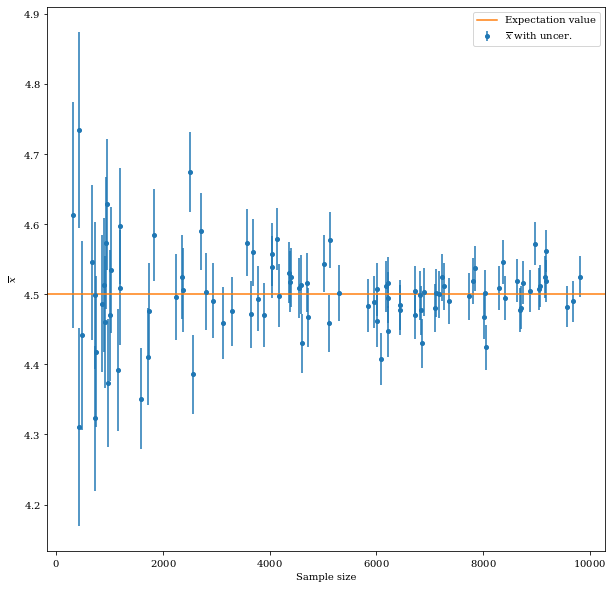

In [11]:
np.random.seed(123456)
def me(sample):
    return len(sample), sample.mean(), sample.std()/np.sqrt(len(sample))
data = np.array([me(np.random.randint(0,10,size=n)) 
                 for n in np.random.randint(10,10000,size=100)])
plt.errorbar(data[:,0],data[:,1],data[:,2],fmt='o',label=r'$\overline{x}$ with uncer.',ms=4)
plt.axhline(4.5,label='Expectation value',color='tab:orange')
plt.xlabel('Sample size')
plt.ylabel(r'$\overline{x}$')
plt.legend();

_Avanceret_: Hvorfor overlapper ikke alle fejl med forventningsværdien? Hvor mange af disse kan vi forvente? 

_Advanced_: Why do not all errors overlap with the expectation value? How many of these can we expect?

# Afledte værdier 

Lad $y(x_1,\ldots,x_n)$ være en _afledt_ værdi af de _uafhængige_ målingerne $x_1,\ldots,x_n$, hver med usikkerhed $\delta_{x_i}$

- Hvad er usikkerheden på $y$? 

# Derived values

Let $y(x_1,\ldots,x_n)$ be a _derived_ value of the _independent_ measurements $x_1,\ldots,x_n$, each with uncertainty $\delta_{x_i}$

- What is the uncertainty of $y$?

Husk, usikkerheden er kvadratroden af variansen.  

- Dvs. hvis $x_i$ varierer, så giver det ophav til variation i $y$. 
- Hvordan bestemmer vi variation af en funktion $y(x_1,\ldots,x_n)$? 

Remember, the uncertainty is the square root of the variance.

- That is, if $x_i$ varies, then it gives rise to variation in $y$.
- How do we determine the variation of a function $y(x_1,\ldots,x_n)$?

Partiel afledt af $y$ med hensyn til $x_i$ giver variationen af $y$ når $x_i$ varierer 

Kæderegel for usikkerheder 

$$s_{y}^2 \approx \left(\frac{\partial y}{\partial x_1}\right)^2s_{x_1}^2+\cdots+\left(\frac{\partial y}{\partial x_n}\right)^2s_{x_n}^2\quad.$$

(Tayler udvikling til anden orden)

Partial derivative of $y$ with respect to $x_i$ gives the variation of $y$ when $x_i$ varies

Chain rule for uncertainties

$$s_{y}^2 \approx \left(\frac{\partial y}{\partial x_1}\right)^2s_{x_1}^2+\cdots+\left(\frac{\partial y}{\partial x_n}\right)^2s_{x_n}^2\quad.$$

(Tayler expansion to second order)

## Eksempel $y=a+b$

## Example $y=a+b$

Lad os sige vi har målt 

Let's say we've measured

In [12]:
a, b, da, db = 10, 20, 1, 0.5

og vi vil bestemme $y=a+b$ med tilhørende usikkerhed.  Vi har 

$$\frac{\partial y}{\partial a} = 1\quad\frac{\partial y}{\partial b}=1\quad,$$ 

så 

and we want to determine $y=a+b$ with associated uncertainty. We have

$$\frac{\partial y}{\partial a} = 1\quad\frac{\partial y}{\partial b}=1\quad,$$

so

In [13]:
y = a+b
dy = np.sqrt(1**2 * da**2 + 1**2 * db**2)
print('y = {:.0f} +/- {:.0f}'.format(y,dy))

y = 30 +/- 1


Med samme værdier af $a,b$, hvad er usikkerheden på $ab$? $a/b$? 

With the same values ​​of $a,b$, what is the uncertainty of $ab$? $a/b$?

In [14]:
dprod = np.sqrt(b**2 * da**2 + a**2 * db**2)
drat  = np.sqrt(1/b**2 * da**2 + a**2 / b**4 * db**2)
print('d(a*b)={:.0f}   d(a/b)={:.1f}'.format(dprod,drat))

d(a*b)=21   d(a/b)=0.1
